In [63]:
#1.- Cargar el dataset
# Instala las bibliotecas necesarias: pandas para manejo de datos y openpyxl para leer archivos Excel
!pip install pandas openpyxl

# Importa la funcionalidad de Google Colab para cargar archivos
from google.colab import files

# Importa pandas para manejar los datos y otras bibliotecas de procesamiento de datos
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Estas se usarán para normalización y codificación, respectivamente

# Cargar el archivo CSV con pandas
uploaded = files.upload()  # Abre un cuadro de diálogo para cargar archivos en Google Colab
df = pd.read_csv("kc_house_data.csv")  # Lee el archivo CSV cargado en una data de pandas

# Imprime la data completa para revisar el contenido
print(df)

# Crear una nueva data vacía, donde podrás agregar entradas nuevas en el futuro
new_entry = pd.DataFrame({  # Aquí puedes agregar datos manualmente para luego integrarlos a la data
})

# Mostrar las primeras filas de la data (esto es útil para ver una pequeña muestra del dataset)
print(df.head())  # Muestra las primeras 5 filas de la data cargada

Saving kc_house_data.csv to kc_house_data (1).csv
               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0   

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [ ]:
#2.-Preprocesamiento de los datos
# Verificar si hay valores nulos en cada columna
print(df.isnull().any())
# Inspeccionar el tipo de datos de cada columna
print(df.dtypes)

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_

In [65]:
# Importa la clase datetime desde el módulo datetime
from datetime import datetime
# Calcula la edad de la casa restando el año de construcción del año actual
df['house_age'] = datetime.now().year - df['yr_built']
# Imprime las primeras filas de la data para mostrar la nueva columna 'house_age'
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          

In [66]:
# Elimina las columnas 'id' y 'date'
df = df.drop(['id', 'date'],axis=1)

In [85]:
# Definimos la función 'remove_outliers' que elimina los outliers (valores atípicos) de una columna específica de un DataFrame
def remove_outliers(df, column):
    # Calculamos el primer cuartil (Q1) de la columna especificada
    Q1 = df[column].quantile(0.25)
    # Calculamos el tercer cuartil (Q3) de la columna especificada
    Q3 = df[column].quantile(0.75)

    # Calculamos el rango intercuartílico (IQR) como la diferencia entre Q3 y Q1
    IQR = Q3 - Q1

    # Calculamos el límite inferior para detectar los outliers
    lower_bound = Q1 - 1.5 * IQR
    # Calculamos el límite superior para detectar los outliers
    upper_bound = Q3 + 1.5 * IQR

    # Devolvemos el DataFrame filtrado, eliminando las filas que contienen outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Eliminar valores atípicos en columnas clave
columns_to_clean = ['price', 'sqft_lot', 'bedrooms', 'bathrooms']
cleaned_data = df.copy()

for col in columns_to_clean:
    cleaned_data = remove_outliers(cleaned_data, col)

# Comparar tamaños del dataset antes y después de eliminar valores atípicos
original_size = len(df)
cleaned_size = len(cleaned_data)
print(f"Tamaño original: {original_size}, Tamaño después de limpiar: {cleaned_size}")


Tamaño original: 21613, Tamaño después de limpiar: 17772


<Axes: title={'center': 'Pearson Correlation of features'}>

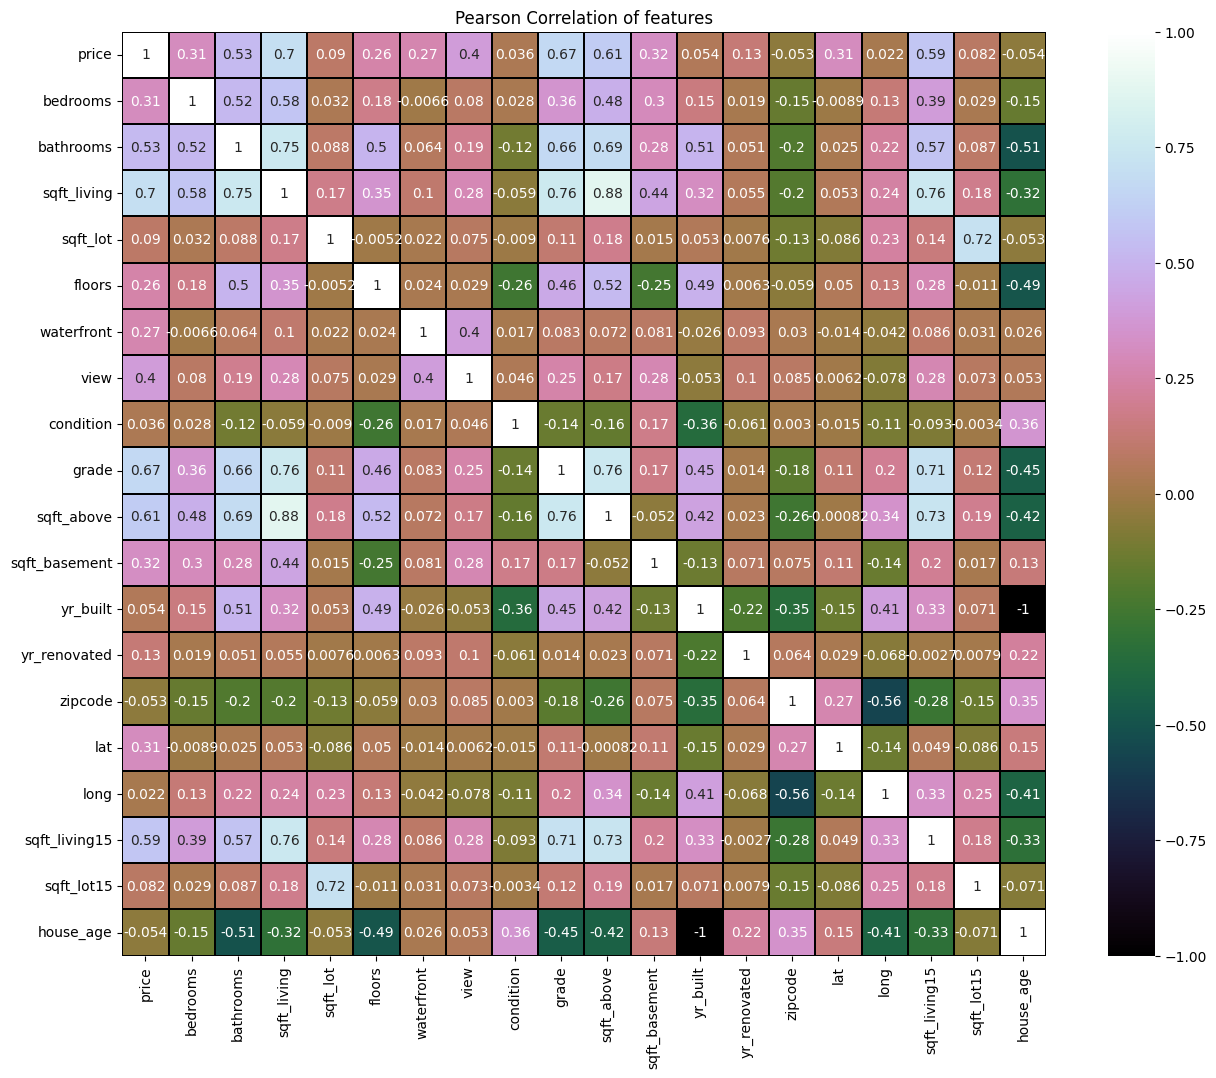

In [ ]:
#3.-Visualizacion de los datos (correlación)
# Crear una lista vacía para contener las columnas que contienen cadenas (palabras)
str_list = []
for colname, colvalue in data.items():
    # Verificar si el segundo valor de la columna (un valor en la columna) es de tipo cadena (str)
    if type(colvalue[1]) == str:
        str_list.append(colname)  # Si es una cadena, agregar el nombre de la columna a la lista str_list
# Obtener las columnas numéricas invirtiendo la lista de cadenas con .difference()
# La diferencia entre todas las columnas y las que contienen cadenas nos da las columnas numéricas
num_list = data.columns.difference(str_list)

# Crear un nuevo DataFrame solo con las características numéricas
house_num = data[num_list]

# Configurar la figura para el gráfico de la matriz de correlación
f, ax = plt.subplots(figsize=(16, 12))  # Establecer el tamaño de la figura

# Título del gráfico
plt.title('Pearson Correlation of features')
# Dibujar el mapa de calor usando seaborn
# El .corr() calcula la correlación de Pearson entre las columnas numéricas del DataFrame
# `house_num.astype(float)` asegura que todas las columnas sean de tipo float para la correlación
# sns.heatmap() crea el mapa de calor, ajustando el color, tamaño y otras opciones
sns.heatmap(house_num.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [89]:
#4.- Construcción de modelos y entrenamiento
# Primero, extraemos la variable objetivo, que en este caso son los precios de las casas
Y = df.price.values  # Extrae los valores de la columna 'price' y los guarda en un arreglo de numpy.
# 'Y' es el vector objetivo, es decir, los precios de las casas que queremos predecir o analizar.

# Eliminamos la columna 'price' del DataFrame de casas y creamos una matriz con el resto de los datos
house = df.drop(['price'], axis=1)  # Elimina la columna 'price' para que solo queden las características.
# La variable 'house' ahora contiene todos los atributos (columnas) de las casas, excepto 'price'.

# Usamos .values o .to_numpy() en lugar de .as_matrix() para obtener una representación en forma de matriz
X = df.values  # Convierte el DataFrame completo (sin la columna 'price') en una matriz de numpy.
# La variable 'X' es la matriz de características (atributos de las casas) que será utilizada como entrada para los modelos.

# Guardamos los nombres de las columnas (características) en una lista llamada "colnames"
colnames = df.columns  # data.columns devuelve los nombres de todas las columnas de 'data'.
# 'colnames' es una lista que contiene los nombres de las características del conjunto de datos.

In [ ]:
# Construimos nuestro modelo de Regresión Lineal
lr = LinearRegression()  # Creamos una instancia de la clase LinearRegression. No es necesario usar normalize=True.
# 'lr' es nuestro modelo de regresión lineal.

# Ajustamos el modelo de regresión lineal a las características X y los precios Y
lr.fit(X, Y)  # Entrenamos el modelo utilizando las características X (entradas) y los precios Y (salida).

# Realizamos una selección de características usando RFE (Eliminación Recursiva de Características)
# RFE selecciona las características más importantes para el modelo, eliminando las menos importantes.
rfe = RFE(lr, n_features_to_select=1, verbose=3)
# 'n_features_to_select=1' indica que queremos seleccionar solo una característica.
# 'verbose=3' proporciona detalles sobre el proceso de eliminación recursiva.

# Ajustamos el selector RFE al modelo de regresión lineal y los datos
rfe.fit(X, Y)

# Función para generar un ranking de características según su importancia en RFE
def ranking(ranks, names, order=1):
    ranks = map(lambda x: round(x, 2), ranks)  # Redondea los valores de los rangos a dos decimales.
    return dict(zip(names, ranks))  # Devuelve un diccionario con los nombres de las características y sus rangos.

# Inicializamos un diccionario para almacenar los rangos de las características según RFE
ranks = {}  # Creamos un diccionario vacío para almacenar los rankings.
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
# 'rfe.ranking_' contiene los rangos asignados a cada característica por RFE.
# Las características con menor rango son más importantes. Convertimos los valores a flotantes y los redondeamos.
# Usamos el diccionario con los nombres de las características 'colnames' y sus rangos.

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [ ]:
# Usando Regresión Lineal
lr = LinearRegression()  # Creamos una instancia del modelo de regresión lineal.
# Se ha eliminado 'normalize=True' ya que ahora la normalización no es necesaria en la clase LinearRegression.
lr.fit(X, Y)  # Entrenamos el modelo de regresión lineal con las características (X) y los precios (Y).

# Guardamos los rangos de características basados en los coeficientes absolutos del modelo de regresión lineal.
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)
# 'lr.coef_' devuelve los coeficientes del modelo para cada característica.
# Usamos np.abs() para obtener los valores absolutos de los coeficientes, ya que el signo no afecta la importancia relativa.
# Los rangos de las características se almacenan en el diccionario 'ranks' bajo la clave 'LinReg'.

# Usando Ridge (Regresión de Ridge)
ridge = Ridge(alpha=7)  # Creamos una instancia del modelo de regresión Ridge con un valor de 'alpha' (regularización).
ridge.fit(X, Y)  # Entrenamos el modelo Ridge con las características (X) y los precios (Y).

# Guardamos los rangos de características basados en los coeficientes absolutos del modelo Ridge.
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)
# 'ridge.coef_' devuelve los coeficientes del modelo Ridge para cada característica.
# Usamos np.abs() para obtener los valores absolutos de los coeficientes, como en el caso de la regresión lineal.

# Usando Lasso (Regresión Lasso)
lasso = Lasso(alpha=0.05)  # Creamos una instancia del modelo de regresión Lasso con un valor de 'alpha' (regularización).
lasso.fit(X, Y)  # Entrenamos el modelo Lasso con las características (X) y los precios (Y).

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
numerical_columns = cleaned_data.select_dtypes(include=['int64', 'float64']).columns

# Aplicar Min-Max Scaling
scaler = MinMaxScaler()
normalized_data = cleaned_data.copy()
normalized_data[numerical_columns] = scaler.fit_transform(cleaned_data[numerical_columns])

# Verificar los datos normalizados
print(normalized_data.describe())

# Dividir el conjunto de datos (using normalized data)
X = normalized_data.drop(columns=["price"])
y = normalized_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
X = cleaned_data.drop(columns=["price"])
y = cleaned_data['price']
# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Mostrar los coeficientes
coefficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})
print("Coeficientes de la regresión multivariable:")
print(coefficients)
X_train_with_const = sm.add_constant(X_train)  # Add constant for intercept
model_statsmodels = sm.OLS(y_train, X_train_with_const).fit()
print(model_statsmodels.summary())
#########
residuos = y_test - y_pred
# Mostrar los residuos
print(residuos)
promedio_residuos = residuos.mean()
print(promedio_residuos)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  17772.000000  17772.000000  17772.000000  17772.000000  17772.000000   
mean       0.369908      0.431184      0.433949      0.211588      0.376236   
std        0.193538      0.263175      0.193829      0.102219      0.194192   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.221163      0.333333      0.285714      0.134588      0.241210   
50%        0.330791      0.333333      0.428571      0.196816      0.375450   
75%        0.483317      0.666667      0.571429      0.273517      0.488974   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             floors    waterfront          view     condition         grade  \
count  17772.000000  17772.000000  17772.000000  17772.000000  17772.000000   
mean       0.190738      0.001576      0.037883      0.602352      0.434595   
std        0.217541      0.039663      0.148342    

In [ ]:
# Usando Random Forest (Regresor)
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
# Creamos una instancia del modelo RandomForestRegressor con los siguientes parámetros:
# 'n_jobs=-1' permite usar todos los núcleos disponibles en el procesador para acelerar el entrenamiento.
# 'n_estimators=50' indica que el modelo utilizará 50 árboles en el bosque aleatorio.
# 'verbose=3' proporciona información detallada sobre el proceso de ajuste del modelo (número de árboles, etc.).

rf.fit(X, Y)  # Entrenamos el modelo RandomForestRegressor utilizando las características (X) y los precios (Y).

# Guardamos los rangos de características basados en la importancia de las características del modelo Random Forest.
ranks["RF"] = ranking(rf.feature_importances_, colnames)
# 'rf.feature_importances_' devuelve un arreglo con la importancia relativa de cada característica.
# Las características con mayor valor en 'feature_importances_' son las más importantes para predecir el precio.
# Usamos la función 'ranking' para asociar cada característica con su importancia relativa y almacenamos los resultados en el diccionario 'ranks' bajo la clave 'RF'.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.6s


building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.0s finished


In [ ]:
#5.- Crear comparativas, gráficos, visualizaciones
# Creamos un diccionario vacío para almacenar el valor medio calculado a partir de todos los puntajes
r = {}

# Iteramos sobre cada columna en las columnas de 'data'
for name in colnames:
    # Omitimos 'price' ya que es la variable objetivo y no una característica
    if name == 'price':
        continue
    # Calculamos la media de los rangos de cada característica (columna) en todos los métodos
    r[name] = round(np.mean([ranks[method][name]
                             for method in ranks.keys() if name in ranks[method]]), 2)

# Guardamos los rangos medios calculados en el diccionario 'ranks' bajo la clave 'Mean'
methods = sorted(ranks.keys())  # Ordenamos los métodos alfabéticamente
ranks["Mean"] = r  # Añadimos los rangos medios al diccionario de 'ranks'
methods.append("Mean")  # Añadimos 'Mean' a la lista de métodos

# Imprimimos los encabezados de las columnas, primero los nombres de los métodos
print("\t%s" % "\t".join(methods))

# Iteramos sobre las columnas (características) y mostramos los rangos para cada método
for name in colnames:
    # Omitimos 'price' al imprimir los rangos
    if name == 'price':
        continue
    # Imprimimos el nombre de la característica seguido de sus rangos según los métodos
    print("%s\t%s" % (name, "\t".join(map(str,
                         [ranks[method].get(name, '-') for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	Mean
bedrooms	0.0	0.0	0.0	9.0	0.0	1.8
bathrooms	0.0	0.0	0.0	3.0	0.0	0.6
sqft_living	0.0	0.0	0.0	17.0	0.0	3.4
sqft_lot	0.0	0.0	0.0	20.0	0.0	4.0
floors	0.0	0.0	0.0	6.0	0.0	1.2
waterfront	0.0	0.0	0.0	2.0	0.0	0.4
view	0.0	0.0	0.0	10.0	0.0	2.0
condition	0.0	0.0	0.0	7.0	0.0	1.4
grade	0.0	0.0	0.0	5.0	0.0	1.0
sqft_above	0.0	0.0	0.0	18.0	0.0	3.6
sqft_basement	0.0	0.0	0.0	16.0	0.0	3.2
yr_built	0.0	0.0	0.0	15.0	0.0	3.0
yr_renovated	0.0	0.0	0.0	12.0	0.0	2.4
zipcode	0.0	0.0	0.0	11.0	0.0	2.2
lat	0.0	0.0	0.0	8.0	0.0	1.6
long	0.0	0.0	0.0	4.0	0.0	0.8
sqft_living15	0.0	0.0	0.0	14.0	0.0	2.8
sqft_lot15	0.0	0.0	0.0	19.0	0.0	3.8
house_age	0.0	0.0	0.0	13.0	0.0	2.6


<ipython-input-85-a33ab8cd5799>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Mean Ranking", y="Feature", data=meanplot, kind="bar",


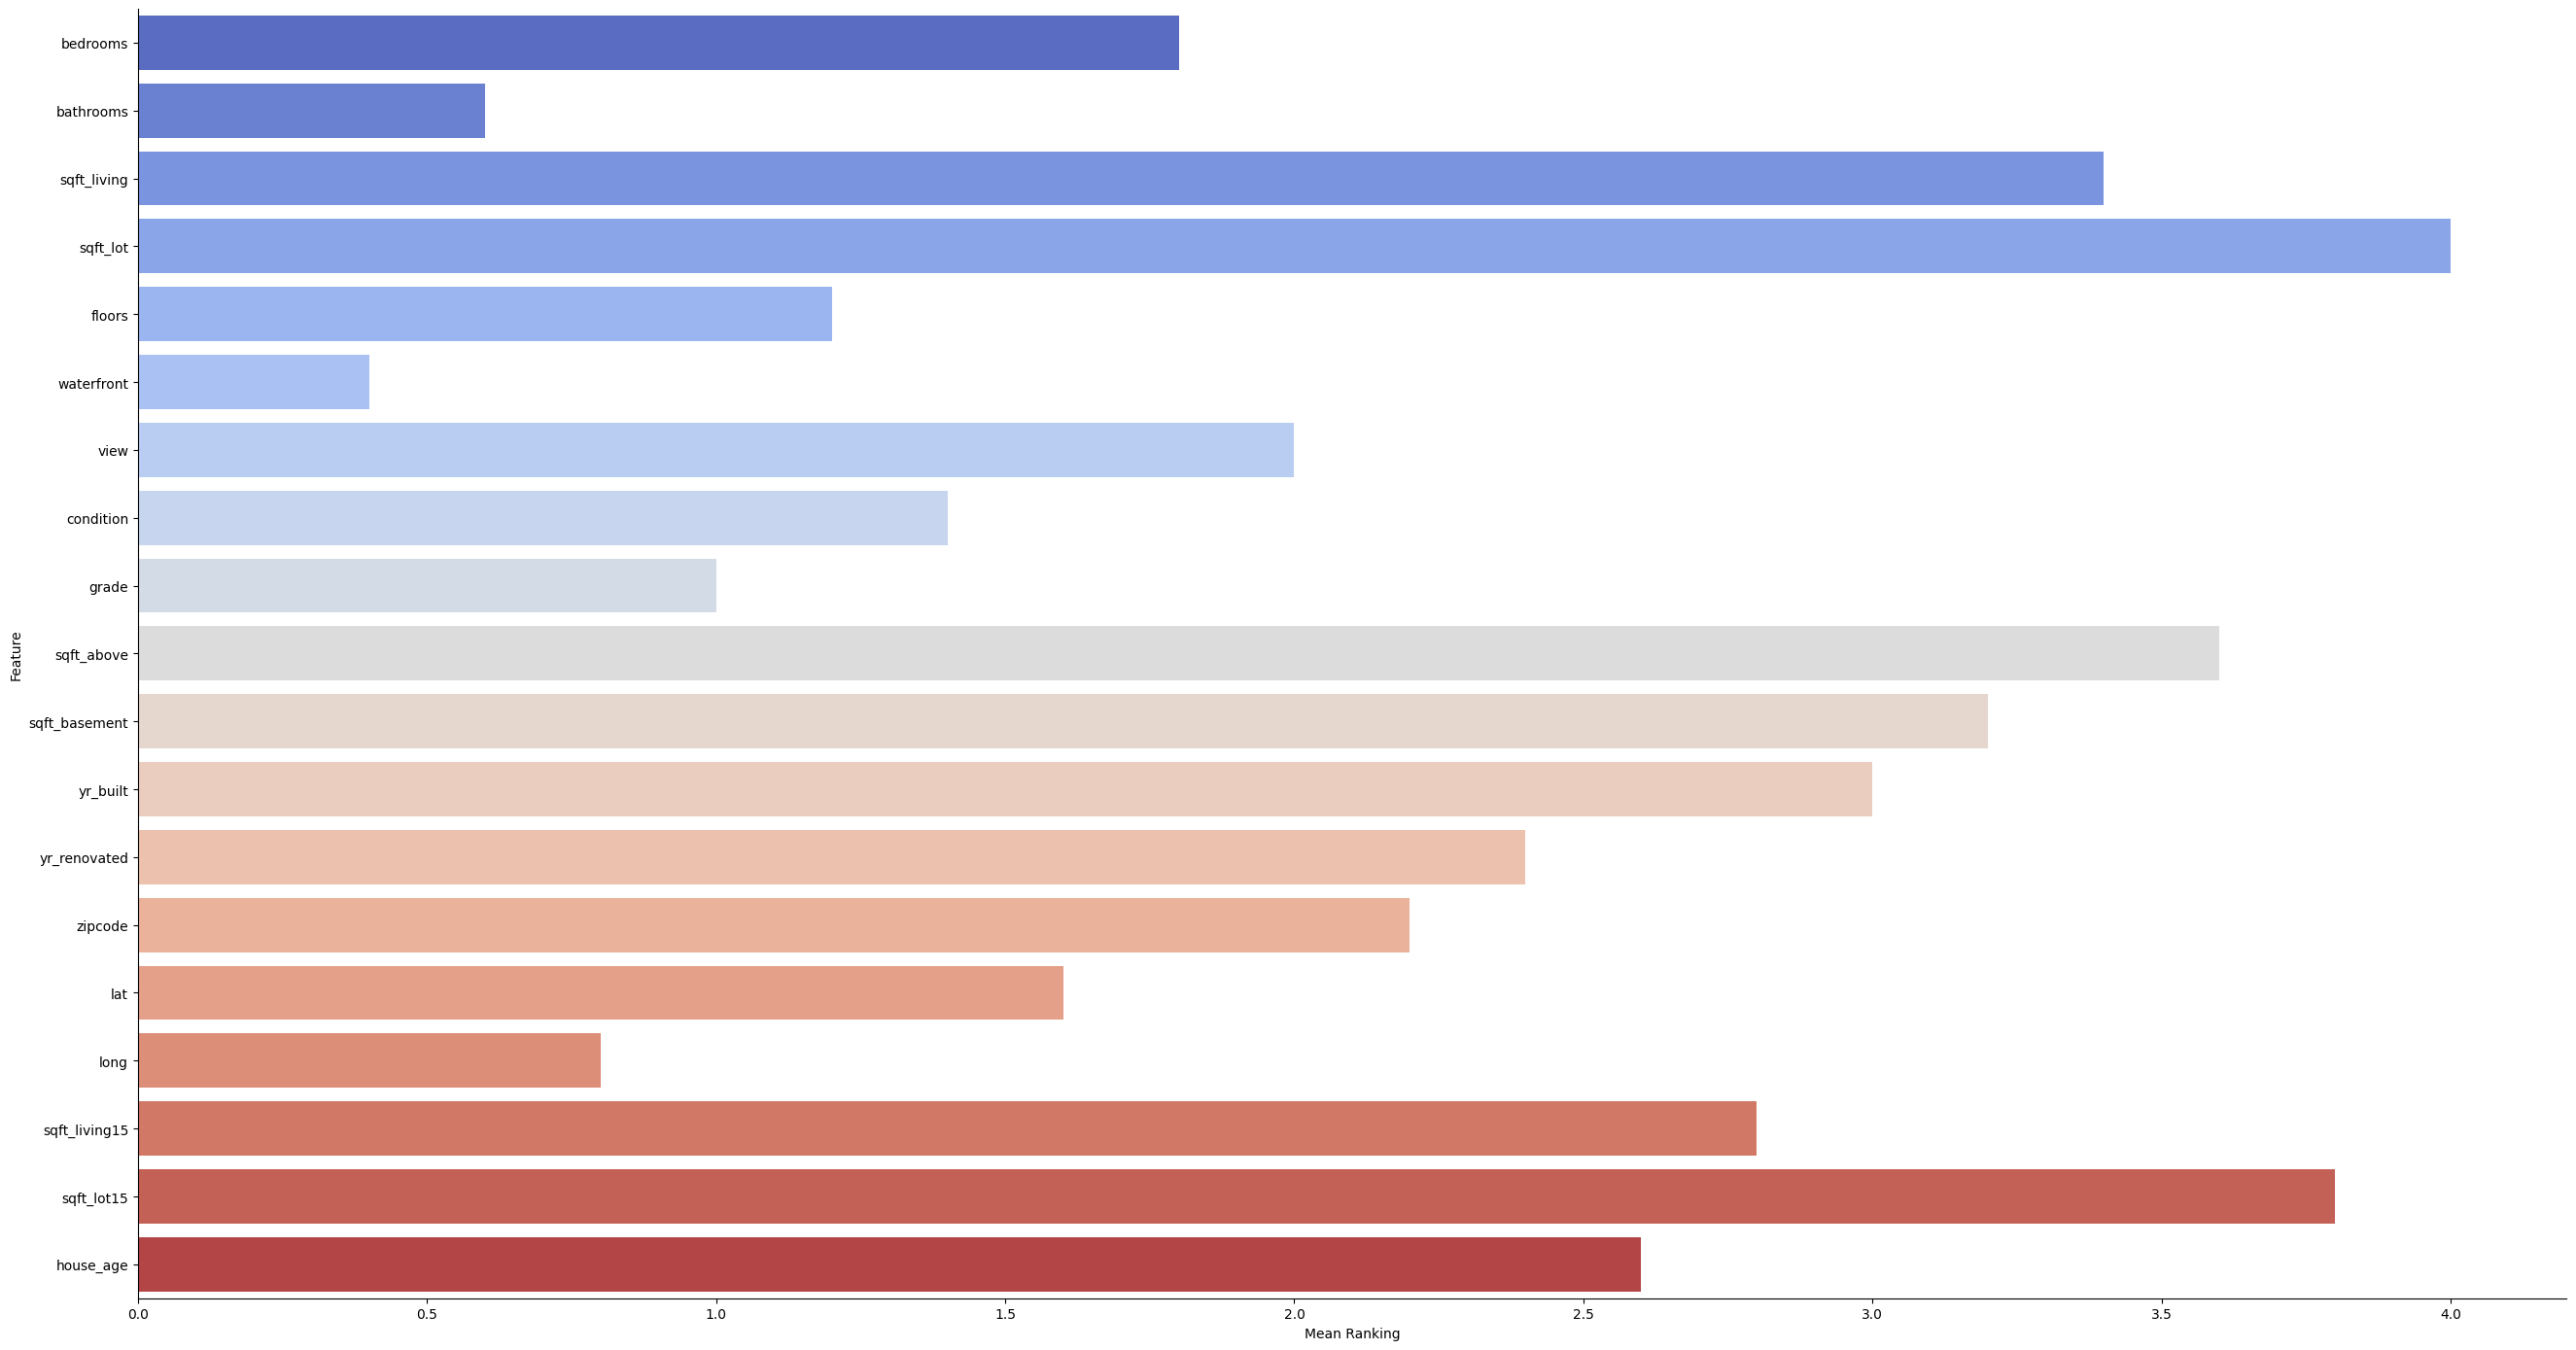

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos el DataFrame 'meanplot' a partir del diccionario 'r', que contiene las características y sus rangos medios
# 'r.items()' convierte el diccionario 'r' en una lista de tuplas, donde cada tupla contiene (característica, ranking medio).
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])
# 'meanplot' es un DataFrame con dos columnas: 'Feature' (las características) y 'Mean Ranking' (los valores medios de los rangos).

# Ordenamos los valores en 'meanplot' por la columna 'Mean Ranking' de manera descendente, para que las características con mayor ranking aparezcan primero.
meanplot1 = meanplot.sort_values('Mean Ranking', ascending=False)

# Ahora podemos proceder a crear el gráfico utilizando seaborn
sns.catplot(x="Mean Ranking", y="Feature", data=meanplot, kind="bar",
            height=14, aspect=1.9, palette="coolwarm")
# 'sns.catplot' crea un gráfico de barras (ya que 'kind="bar"'), en el cual:
# - 'x="Mean Ranking"': Se usa la columna 'Mean Ranking' para el eje x (valor de la clasificación media).
# - 'y="Feature"': Se usa la columna 'Feature' para el eje y (nombre de la característica).
# - 'data=meanplot': Usamos el DataFrame 'meanplot' como fuente de datos.
# - 'height=14': Define la altura del gráfico en pulgadas.
# - 'aspect=1.9': Ajusta la relación de aspecto del gráfico (esencialmente su anchura).
# - 'palette="coolwarm"': Define el esquema de colores del gráfico, con tonos fríos y cálidos.

# Mostramos el gráfico
plt.show()

Error cuadrático medio (MSE): 76484977061.77612
Coeficiente de determinación (R^2): 0.49406905389089006


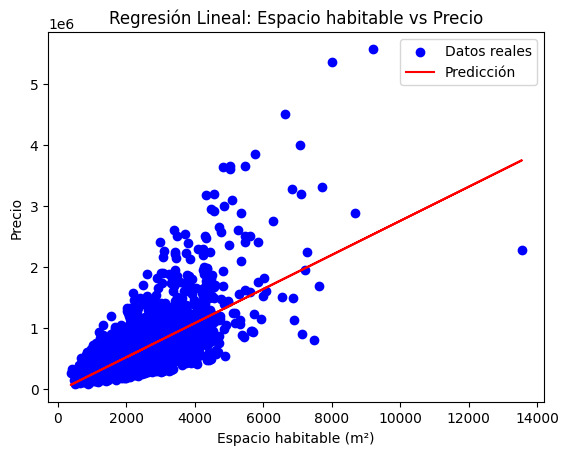

In [ ]:
X = df[["sqft_living"]].values  # Espacio habitable como variable independiente
y = df['price'].values  # Precio como variable dependiente

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Visualización de los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.xlabel('Espacio habitable (m²)')
plt.ylabel('Precio')
plt.legend()
plt.title('Regresión Lineal: Espacio habitable vs Precio')
plt.show()

In [ ]:
!pip install folium pandas


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Filtrar datos para asegurar que tienen latitud y longitud
data = df.dropna(subset=['lat', 'long'])

# Crear el mapa base centrado en el promedio de latitud y longitud
avg_lat = data['lat'].mean()
avg_lon = data['long'].mean()
mapa = folium.Map(location=[avg_lat, avg_lon], zoom_start=10)

# Crear lista de coordenadas para el mapa de calor
heat_data = data[['lat', 'long']].values.tolist()

# Agregar el mapa de calor
HeatMap(heat_data).add_to(mapa)

# Guardar el mapa como archivo HTML o mostrar en un Jupyter Notebook
mapa.save('mapa_calor.html')
mapa  # Esto es para mostrar el mapa si estás en un Jupyter Notebook

Matriz de correlación:
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
house_age       -0.054012
Name: price, dtype: float64
Mean Squared Error (MSE): 21642573703.34
R^2 Score: 0.86

Importancia de las características:
bedrooms: 0.0026
bathrooms: 0.0124
sqft_living: 0.2719
sqft_lot: 0.0128
floors: 0.0018
waterfront: 0.0320
view: 0.0097
condition: 0.0025
grade: 0.3224
sqft_above: 0.0186
sqft_basement: 0.0057
yr_built: 0.0165
yr_renovated: 0.0020
zipcode: 0.0140
lat: 0.1538
long: 0.0618
sqft_living15: 0.0301
sqft_lot15: 0.0114
house_age: 0.0181


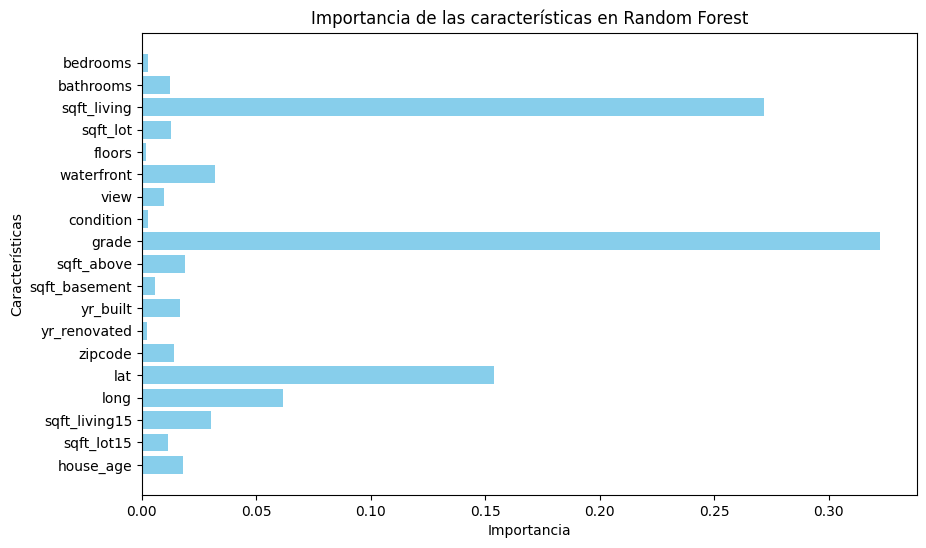

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Revisa que 'price' esté solo en 'y' y no en 'X'
# Excluye 'price' y cualquier otra columna que pueda estar derivada de 'price'
X = df.drop(columns=['price'])  # Ejemplo de eliminación
y = df['price']

# 2. Análisis de correlación para identificar posibles fugas
correlation_matrix = df.corr()
print("Matriz de correlación:")
print(correlation_matrix['price'].sort_values(ascending=False))

# 3. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Crear y entrenar el modelo de Random Forest con hiperparámetros ajustados
# Aumentamos el número de estimadores y limitamos la profundidad para evitar overfitting
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Evaluar el modelo
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# 6. Mostrar la importancia de las características
importances = rf_model.feature_importances_
features = X.columns
print("\nImportancia de las características:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

# 7. Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características en Random Forest')
plt.gca().invert_yaxis()

In [81]:
#7.- Residuos
# Agregar una constante a las variables independientes (intercepto)
import statsmodels.api as sm
X_test_with_const = sm.add_constant(X_test)  # Use X_test instead of X_train

# Crear y ajustar el modelo de regresión de los residuos
model_residuos = sm.OLS(residuos, X_test_with_const).fit()

# Mostrar el resumen de la regresión de los residuos
print(model_residuos.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7775
Date:                Tue, 19 Nov 2024   Prob (F-statistic):              0.695
Time:                        02:44:03   Log-Likelihood:                -41594.
No. Observations:                3201   AIC:                         8.322e+04
Df Residuals:                    3186   BIC:                         8.331e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6066      1.959      0.820